In [35]:
%reload_ext watermark
%watermark -a "Addi Wei" -d -t -v -p numpy,pandas,matplotlib.pyplot,numpy,xgboost -g

Addi Wei 2019-03-23 15:13:22 

CPython 3.6.5
IPython 6.4.0

numpy 1.14.3
pandas 0.23.0
matplotlib.pyplot 2.2.2
numpy 1.14.3
xgboost 0.82
Git hash: ba90e54b9c80fb0233f6fab13ee1f26a1e58fbe1


In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb

In [3]:
#data below used for EDA and feature engineering
df_aisles = pd.read_csv('aisles.csv')
df_dept = pd.read_csv('departments.csv')
df_order_products_prior = pd.read_csv('order_products__prior.csv')
df_orders = pd.read_csv('orders.csv')
df_products = pd.read_csv('products.csv')

#data below used for training and testing model
df_train = pd.read_csv('order_products__train_cap.csv')
df_test = pd.read_csv('order_products__test_cap.csv')




In [4]:
df_aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [5]:
df_dept.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [6]:
df_order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [7]:
df_orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [8]:
df_products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [9]:
df_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,36,39612,1,0
1,36,19660,2,1
2,36,49235,3,0
3,36,43086,4,1
4,36,46620,5,1


In [10]:
df_test.head()

,order_id,product_id
0,1,49302
1,1,11109
2,1,10246
3,1,49683
4,1,43633


In [11]:
#observe types of data 
print(df_aisles.dtypes)
print(df_dept.dtypes)
print(df_order_products_prior.dtypes)
print(df_orders.dtypes)
print(df_products.dtypes)

aisle_id     int64
aisle       object
dtype: object
department_id     int64
department       object
dtype: object
order_id             int64
product_id           int64
add_to_cart_order    int64
reordered            int64
dtype: object
order_id                    int64
user_id                     int64
eval_set                   object
order_number                int64
order_dow                   int64
order_hour_of_day           int64
days_since_prior_order    float64
dtype: object
product_id        int64
product_name     object
aisle_id          int64
department_id     int64
dtype: object


In [12]:
#look for null values
print(df_aisles.isnull().sum())

aisle_id    0
aisle       0
dtype: int64


In [13]:
print(df_dept.isnull().sum())

department_id    0
department       0
dtype: int64


In [14]:
print(df_order_products_prior.isnull().sum())

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64


In [36]:
print(df_orders.isnull().sum())
# this was only data that contained null values.
print(df_orders.shape)
print(df_orders.days_since_prior_order.isnull().sum() / len(df_orders.index))
# 6 % of data has null values - let's drop the nulls

df_orders.dropna()

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64
(3421083, 7)
0.06027594185817766


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
order_id,,,,,,,
2398795,2398795,1,prior,2,3,7,15.0
473747,473747,1,prior,3,3,12,21.0
2254736,2254736,1,prior,4,4,7,29.0
431534,431534,1,prior,5,4,15,28.0
3367565,3367565,1,prior,6,2,7,19.0
550135,550135,1,prior,7,1,9,20.0
3108588,3108588,1,prior,8,1,14,14.0
2295261,2295261,1,prior,9,1,16,0.0
2550362,2550362,1,prior,10,4,8,30.0


In [16]:
print(df_aisles.isnull().sum())

aisle_id    0
aisle       0
dtype: int64


In [17]:
print(df_products.isnull().sum())

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64


In [18]:
# Thanks to Kaggle data, not too much missing data we have to deal with, move on to some EDA
# CEO wants to know the most popular items and best departments

#merge products with prior orders in order to get product names

# df_all_orders = pd.concat([df_order_products_prior, df_train])


In [38]:
# add in product name, department name, userID to our df_all

df_all = pd.merge(df_order_products_prior, df_products, how='left', on='product_id')
df_all = pd.merge(df_all, df_dept, how='left', on='department_id')
df_all = pd.merge(df_all, df_orders, how='left', on='order_id')

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\IPython\core\interactiveshell.py:2963: FutureWarning: 'order_id' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  exec(code_obj, self.user_global_ns, self.user_ns)


In [39]:
#see product name associated w/ orders 
df_all.head()


,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,Organic Egg Whites,86,16,dairy eggs,202279,prior,3,5,9,8.0
1,2,28985,2,1,Michigan Organic Kale,83,4,produce,202279,prior,3,5,9,8.0
2,2,9327,3,0,Garlic Powder,104,13,pantry,202279,prior,3,5,9,8.0
3,2,45918,4,1,Coconut Butter,19,13,pantry,202279,prior,3,5,9,8.0
4,2,30035,5,0,Natural Sweetener,17,13,pantry,202279,prior,3,5,9,8.0


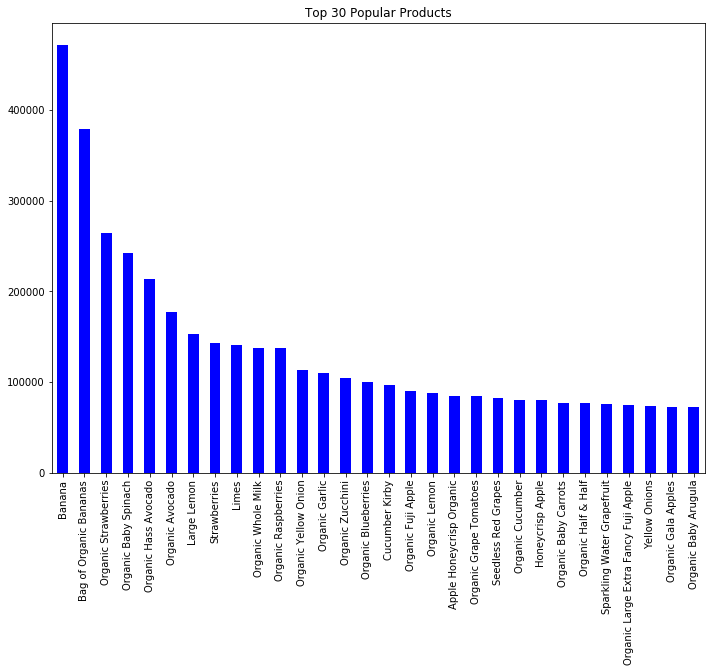

In [40]:
product_counts = df_all['product_name'].value_counts()

dims = (11.7, 8.27)
fix, ax = plt.subplots(figsize= dims)
product_counts[0:30].plot(kind="bar", color='blue')

plt.xticks(rotation=90)
plt.title('Top 30 Popular Products')
plt.show()

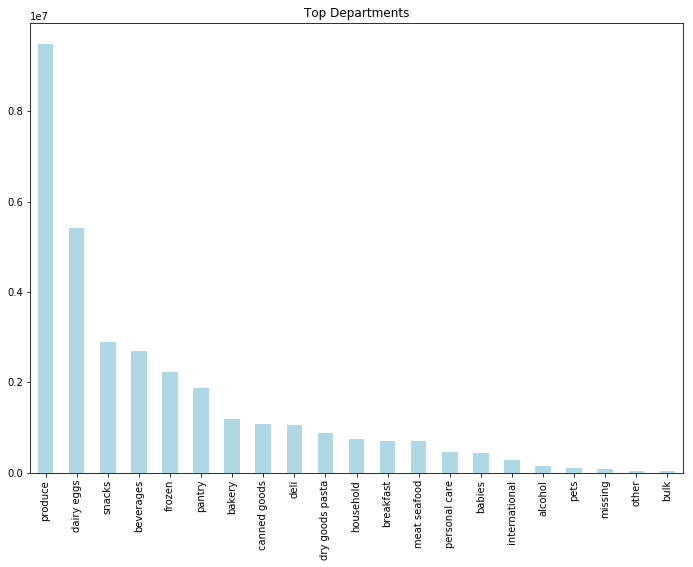

In [41]:
# Top 30 departments 

dept_counts = df_all['department'].value_counts()

dims = (11.7, 8.27)
fix, ax = plt.subplots(figsize= dims)
dept_counts[0:30].plot(kind="bar", color='lightblue')

plt.xticks(rotation=90)
plt.title('Top Departments')
plt.show()

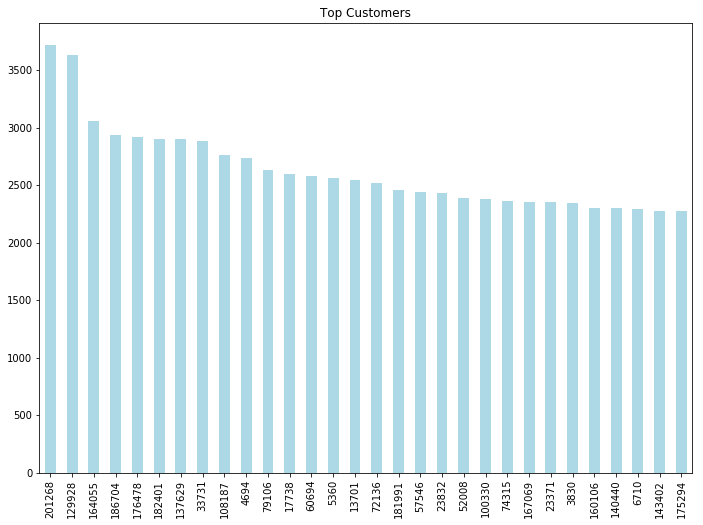

In [42]:
#Assuming user ID = customer ID, here are top 30 customers in terms of products ordered.  Maybe send a coupon their way. 

user_counts = df_all['user_id'].value_counts()

dims = (11.7, 8.27)
fix, ax = plt.subplots(figsize= dims)
user_counts[0:30].plot(kind="bar", color='lightblue')

plt.xticks(rotation=90)
plt.title('Top Customers')
plt.show()


In [ ]:
# Next step: Products feature engineering


products_raw = pd.DataFrame()

products_raw['ordersTotal'] = df_all.groupby(df_all.product_id).size()

products_raw['reordersTotal'] = df_all['reordered'].groupby(df_all.product_id).sum()

products_raw['reorder_rate'] = (products_raw.reordersTotal / products_raw.ordersTotal)

products = df_products.join(products_raw, on = 'product_id')
# products_new.set_index('product_id', drop = False, inplace = True)

del products_raw

products.head()

In [ ]:
#User feature engineering - merge orders with order_products_prior
df_orders.set_index('order_id', inplace = True, drop = False)
merge_prior = pd.merge(df_order_products_prior, df_orders, how = 'left', on = 'order_id')
merge_prior.head()

In [ ]:
users = pd.DataFrame()
users['total_users'] = merge_prior.groupby('product_id').size()
users['all_users'] = merge_prior.groupby('product_id')['user_id'].apply(set)
users['total_distinct_users_perProduct'] = users.all_users.map(len)
users.head()

In [ ]:
customers = pd.DataFrame()
customers['avgDaysBetOrders'] = df_orders.groupby('user_id')['days_since_prior_order'].mean()
customers['numberOfOrders'] = df_orders.groupby('user_id').size()
customers['total_items'] = merge_prior.groupby('user_id').size()
customers['all_products'] = merge_prior.groupby('user_id')['product_id'].apply(set)
customers['total_unique_items'] = customers.all_products.map(len)
customers.head()

In [ ]:
# Feature Engineering for Products + Customers

prod_cust = merge_prior.copy()





In [ ]:
prod_cust['user_product'] = (prod_cust.user_id + prod_cust.product_id)
prod_cust = prod_cust.sort_values('order_number')


In [ ]:
print(prod_cust.isnull().sum())